<a href="https://colab.research.google.com/github/arindamdeyofficial/vertebraeSurgeryRiskFactor/blob/main/Group307_kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Import Libraries/Dataset

b.	Import the required libraries

In [43]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/7e5ba322ac93a5636528e286894521d35f7d4995/kyphosis.csv')

2.	Data Visualization and Exploration



a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [45]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [47]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

2.	Data Visualization and Exploration


b.	Print the description and shape of the dataset.

In [48]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [49]:
df.shape

(81, 4)

2.	Data Visualization and Exploration


c.	Provide appropriate visualization to get an insight about the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

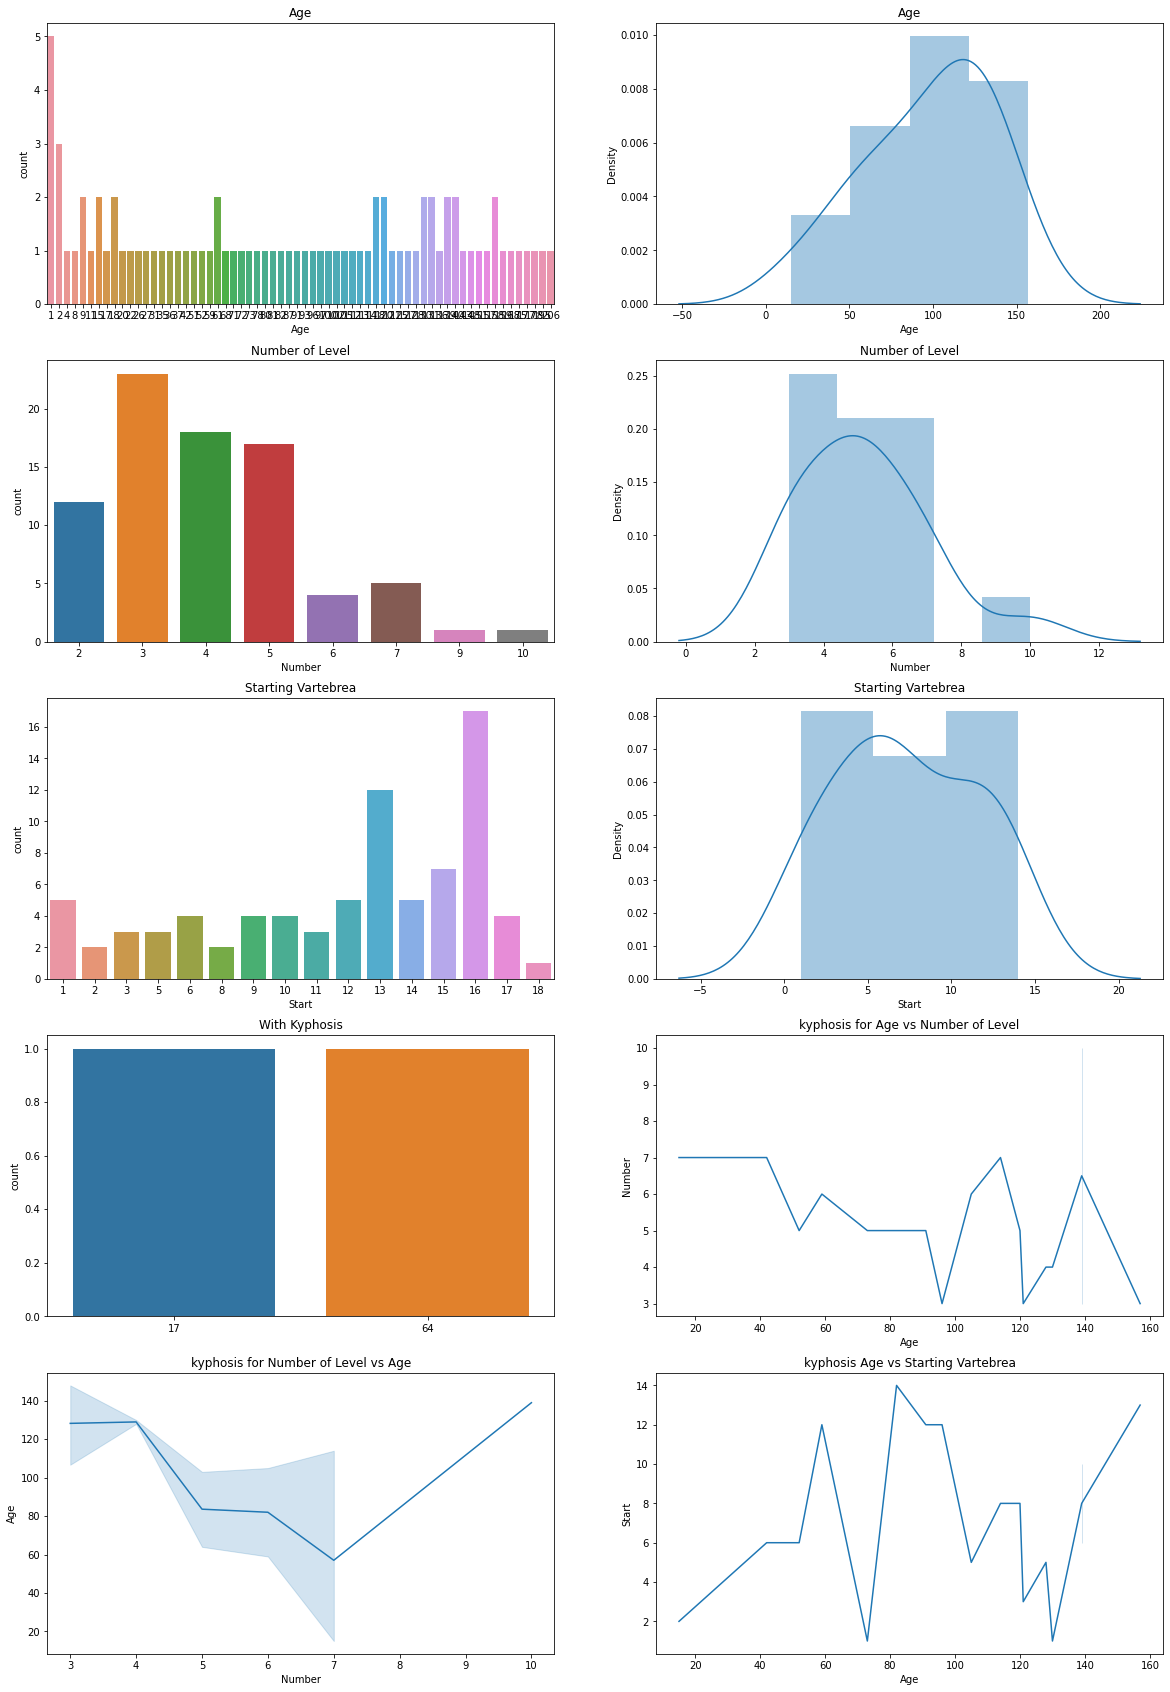

In [50]:
#Number === number of levels involved
#Start === starting vertebrae level of the surgery

n_rows=5
n_cols=2
width=20
height=30

fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))
#Data normalisation view
wk = df[df["Kyphosis"]=="present"]

#Age
g = sns.countplot(df["Age"], ax=ax[0,0])
ax[0,0].set_title("Age")

g = sns.distplot(wk["Age"], ax=ax[0,1])
ax[0,1].set_title("Age")

#Number
g = sns.countplot(df["Number"], ax=ax[1,0])
ax[1,0].set_title("Number of Level")

g = sns.distplot(wk["Number"], ax=ax[1,1])
ax[1,1].set_title("Number of Level")

#Start
g = sns.countplot(df["Start"], ax=ax[2,0])
ax[2,0].set_title("Starting Vartebrea")

g = sns.distplot(wk["Start"], ax=ax[2,1])
ax[2,1].set_title("Starting Vartebrea")

#count kyphosis
l = len(df[df["Kyphosis"]=="present"])
g = sns.countplot([l,len(df)-l], ax=ax[3,0])
ax[3,0].set_title("With Kyphosis")

#Count kyphosis for Age vs Number of Level
#Having kyphosis Age vs Number Lineplot Age in X axis
wk = df[df["Kyphosis"]=="present"]
g = sns.lineplot(data=wk, x="Age", y="Number", ax=ax[3,1])
ax[3,1].set_title("kyphosis for Age vs Number of Level")

#Having kyphosis Number vs Age Countplot Number in X axis
g = sns.lineplot(data=wk, x="Number", y="Age", ax=ax[4,0])
ax[4,0].set_title("kyphosis for Number of Level vs Age")

#Having kyphosis Age vs Starting Vartebrea
g = sns.lineplot(data=wk, x="Age", y="Start",  ax=ax[4,1])
ax[4,1].set_title("kyphosis Age vs Starting Vartebrea")

plt.show()

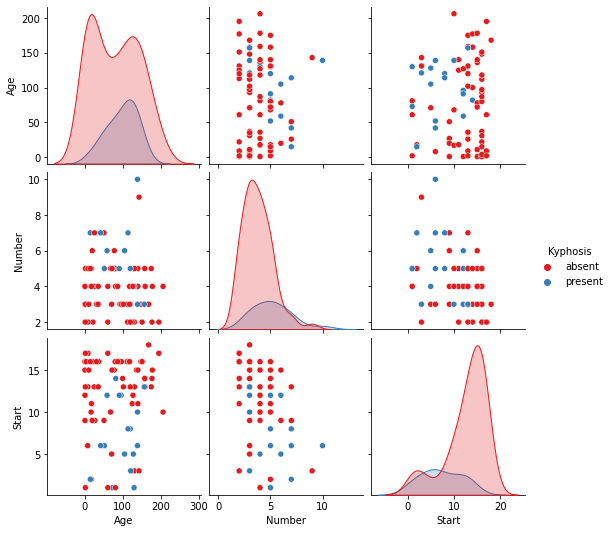

In [51]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

BiVariate analysis

In [52]:
def bi_variate(df, col1, col2):
    cross_name=pd.crosstab(df[col1], df[col2], normalize='index')
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('{}'.format(col2))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,12))
    plt.show()
    return cross_name*100

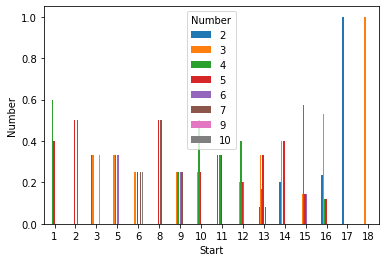

<Figure size 1152x864 with 0 Axes>

Number,2,3,4,5,6,7,9,10
Start,,,,,,,,
1,0.000000,0.000000,60.000000,40.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,0.0
3,33.333333,33.333333,0.000000,0.000000,0.000000,0.000000,33.333333,0.0
5,0.000000,33.333333,33.333333,0.000000,33.333333,0.000000,0.000000,0.0
6,0.000000,25.000000,0.000000,25.000000,0.000000,25.000000,0.000000,25.0
8,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,0.0
9,0.000000,25.000000,25.000000,0.000000,25.000000,25.000000,0.000000,0.0
10,0.000000,25.000000,50.000000,25.000000,0.000000,0.000000,0.000000,0.0
11,33.333333,0.000000,33.333333,33.333333,0.000000,0.000000,0.000000,0.0


In [53]:
bi_variate(df, 'Start', 'Number')

d.	Try exploring the data and see what insights can be drawn from the dataset.


Exploratory data analysis

3.	Data Pre-processing and cleaning

a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.

Now First check should be any Null is present or not

In [55]:
df.isna().any()

Kyphosis    False
Age         False
Number      False
Start       False
dtype: bool

In [56]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

Now there are no Null values present


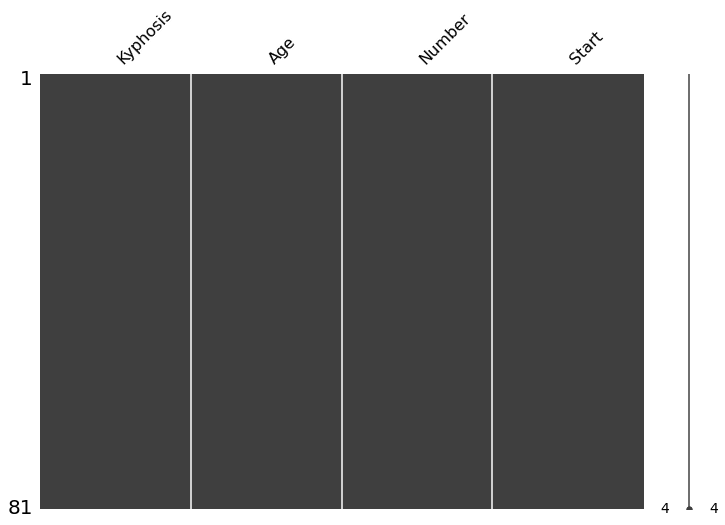

In [57]:
!pip install missingno
import missingno
missingno.matrix(df,figsize=(12,8))

Outlier Identificayion and removal

Box plot use the Inter Quantile Range(IQR) method. This is easier so will be using

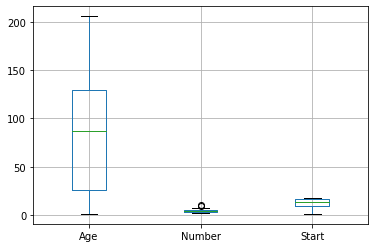

In [58]:
df.boxplot()

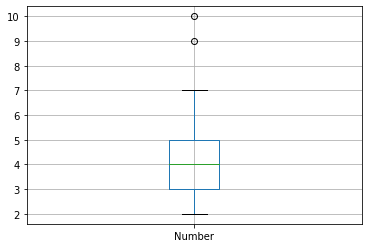

In [59]:
df.boxplot(column=['Number'])

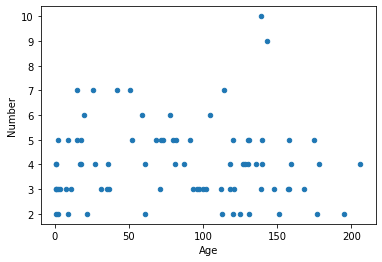

In [60]:
df.plot.scatter('Age', 'Number')

Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured
Through thi method also we can identify Outlier

In [61]:
mean = np.mean(df["Number"]) 
mean

4.049382716049383

In [62]:
std = np.std(df["Number"]) 
std

1.6093955200472556

In [63]:
threshold = 2
outlierCombo = []
outlier = [] 
zScore = [] 
for i in df["Number"]: 
    z = (i-mean)/std 
    if z > threshold: 
      outlierCombo.append([i,z])
      outlier.append(i)
      zScore.append(z)
outlierCombo

[[9, 3.076072489505411], [10, 3.697423790378075]]

In [64]:
df[df["Number"]>=9]

,Kyphosis,Age,Number,Start
42,absent,143,9,3
52,present,139,10,6


This 2 are really unrealistic Age people live according to age also and as per scatter plot and ZScore. So can discard

In [65]:
index_names = df.loc[df["Number"]>=9].index
index_names

Int64Index([42, 52], dtype='int64')

Now we will not drop the record rather will do outlier treatment

In [66]:
df.drop(index_names, inplace = True)
#np.delete(df, index_names, axis =0)

In [67]:
df[df["Number"]>=9]

,Kyphosis,Age,Number,Start


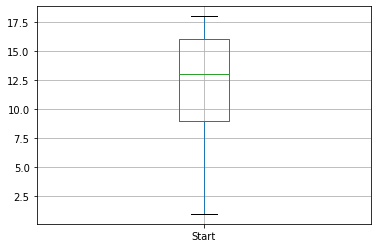

In [68]:
df.boxplot(column=['Start'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c86e6a6d0>,
      dtype=object)

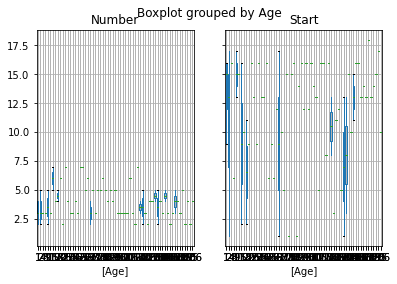

In [69]:
df.boxplot(by="Age")

b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

Replace categorical Column with Numeric value

Column segregartion

In [70]:
df.head(10)
#Encoding (categorical to Numerical)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#target column
target_col=['Kyphosis']

#categorical cols
categorical_cols=df.nunique()[df.nunique() < 5].keys().tolist()
categorical_cols=[x for x in categorical_cols if x not in target_col]
print("categorical columns: {}".format(categorical_cols))

#numerical cols
cont_cols=[x for x in df.columns if x not in categorical_cols+target_col]
print("Numerical columns: {}".format(cont_cols))

#binary cols
bin_cols=df.nunique()[df.nunique() == 2].keys().tolist()
print("Binary columns: {}".format(bin_cols))

#multi cols(more than 2 values)
mul_cols=[x for x in categorical_cols if x not in bin_cols]
print("Multi valued columns: {}".format(mul_cols))

categorical columns: []
Numerical columns: ['Age', 'Number', 'Start']
Binary columns: ['Kyphosis']
Multi valued columns: []


In [71]:
#Label Encoding for Binary cols
le=LabelEncoder()
for i in bin_cols:
    df[i]=le.fit_transform(df[i])

#Duplicating cols for multi-value cols
#df=pd.get_dummies(data=df,columns=mul_cols)
df.head(10)

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
6,0,61,2,17
7,0,37,3,16
8,0,113,2,16
9,1,59,6,12


3.	Data Pre-processing and cleaning

c.	Do the correlational analysis on the dataset. Provide a visualization for the same.

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

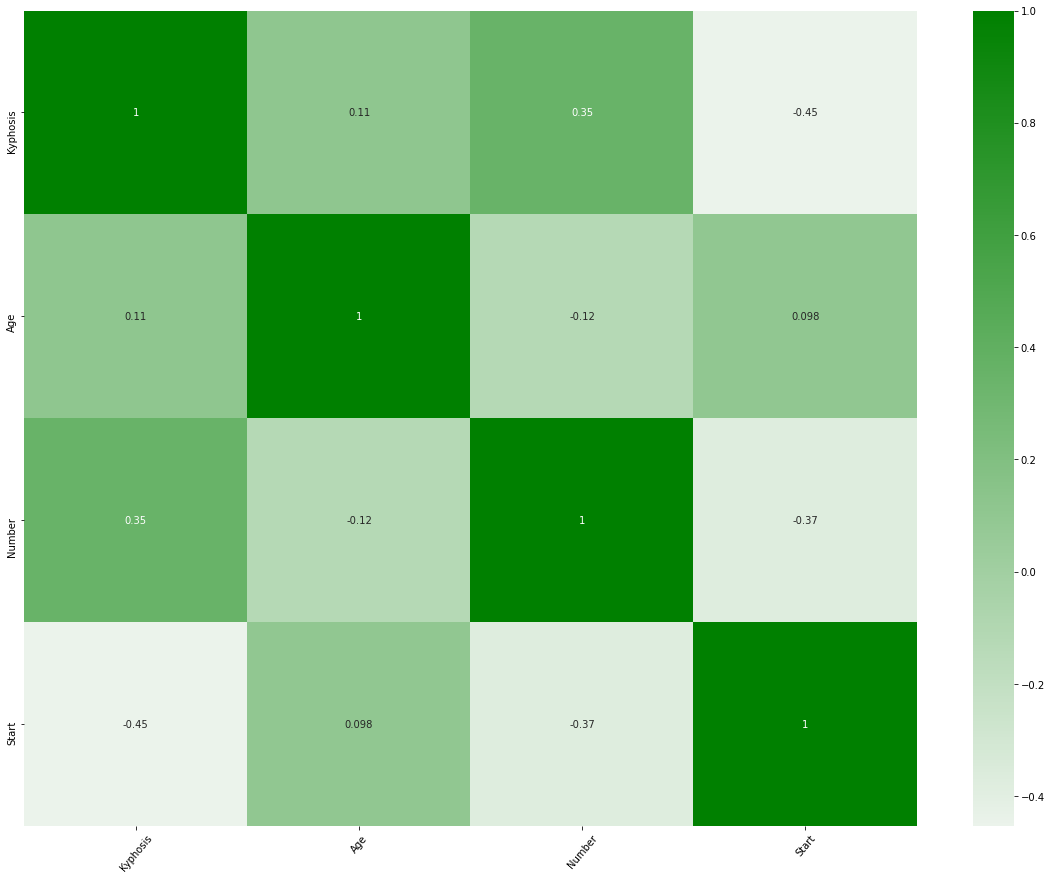

In [72]:
#Co-relation 
#correlation analysis shows us how to determine both the nature and strength of relationship between two variables
#correaltion lies between -1 to 1 (0: No corelation; -1: perfect negative correlation; +1: positive core)
correlation=df.corr()
correlation

#plotting correlation Matrix
plt.figure(figsize=(20,15))
cm = sns.light_palette("green", as_cmap=True)
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, cmap=cm, annot=True)
plt.xticks(rotation=50)

Corelation between coloumns are not between -1 to + 1 i.e. the best but not greater than 0.5 also and between kyphosis as target and other column is generally greater. so we are good.

4.	Data Preparation

a.	Do the final feature selection and extract them into Column X and the class label into Column into Y.

In [73]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

4.	Data Preparation

b.	Split the dataset into training and test sets.

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

Part B

1.	Model Building

a.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.

We will try Descision Tree as data is too small and number of column is also less preferrebly. And also try Random forest and Logistics regression as all of them are Classification models.

We have 7 in general common classification techniques
1. Logistic Regression
2. Naïve Bayes
3. Stochastic Gradient Descent
4. K-Nearest Neighbours
5. Decision Tree
6. Random Forest
7. Support Vector Machine

1.	Model Building

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

b.	 Train the model and print the training accuracy and loss values

In [24]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2.	Performance Evaluation

b.	Do the prediction for the test data and display the results for the inference

In [25]:
prediction=dtree.predict(x_test)

a.	Print the confusion matrix. Provide appropriate analysis for the same.

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,prediction))

print(classification_report(y_test,prediction))

[[14  5]
 [ 6  2]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.29      0.25      0.27         8

    accuracy                           0.59        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.58      0.59      0.58        27



RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc=RandomForestClassifier(n_estimators=20000)

In [31]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rfc_pred=rfc.predict(x_test)

In [33]:
print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[19  0]
 [ 6  2]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.25      0.40         8

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27

